In [9]:
!/gws/pw/j05/cop26_hackathons/bristol/install-kernel

Installed kernelspec cmip6 in /home/users/chebak/.local/share/jupyter/kernels/cmip6
Installed cmip6 Jupyter kernel for the hackathon


In [14]:
#some of these packages may need to be installed first - google conda install 'package name' and install in the terminal
from itertools import chain
from glob import glob
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm 
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from palettable.cmocean.sequential import Algae_20
import numpy as np
from matplotlib.colors import BoundaryNorm

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

ModuleNotFoundError: No module named 'palettable'

In [11]:
#define function for a single spatial plot
def spatialplot(x, y, z, vmin, vmax, cbi, cblab, title): 
    
    # The following section interpolates from the weird grid to a regularly spaced lat lon grid.
    X = x.values.ravel()
    Y = y.values.ravel()
    Z = z.values.ravel()
    triangles = tri.Triangulation(X, Y)
    X_interp, Y_interp = np.meshgrid(np.linspace(-180, 180, 360), np.linspace(-90, 90, 330))
    interp_lin = tri.LinearTriInterpolator(triangles, Z)
    Z_interp = interp_lin(X_interp, Y_interp)


    #load land and create colorbar levels
    levls=np.arange(vmin,vmax,cbi)#arranging the colorbar levels

    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='face',
                                            facecolor=cfeature.COLORS['land'])


    #Plotting
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=0))#change the projection here
    cmap=Algae_20.mpl_colormap #change colormap here
    norm = BoundaryNorm(levls, ncolors=cmap.N, clip=True)#normalising the colorbar to the specified levels
    plot=plt.pcolormesh(X_interp,Y_interp,Z_interp,
                        transform=ccrs.PlateCarree(),
                        cmap=cmap,
                        norm=norm,
                        vmin=vmin,
                        vmax=vmax)
    ax.add_feature(land_10m,facecolor='gray')
    ax.coastlines(resolution='110m')
    cb=plt.colorbar(plot,shrink=0.6,extend='max')#shrink colorbar relative to figure size, extend top of the colorbar
    cb.ax.set_ylabel(cblab)#set colorbar label
    plt.title(title)
    plt.show()

In [12]:
#read in data - change path 
dataset = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r10i1p1f2/Omon/expc/gn/latest/*.nc')

/home/users/chebak/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/users/chebak/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


/home/users/chebak/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


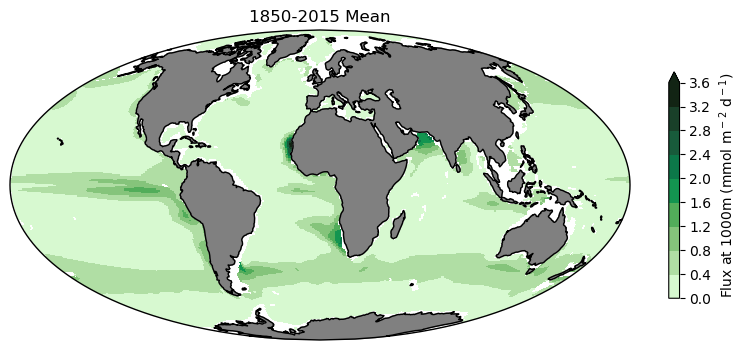

In [13]:
#x=lon, y=lat, z= 2D xarray variable, vmin=variable min value,vmax=variable maximum value, cbs=colorbar intervals
x = dataset['longitude']
y = dataset['latitude']
z = dataset['expc'][:,45,:,:].mean(axis=0)*1000*86400 #time axis average and converting from mol/m2/s to mmol/m2/d
vmin=0
vmax=4
cbi=0.4
cblab='Flux at 1000m (mmol m$^-$$^2$ d$^-$$^1$)'
title='1850-2015 Mean'
#run function
spatialplot(x,y,z,vmin,vmax,cbi,cblab,title)